In [4]:
import requests #для работы с API
import pandas as pd
import json
import time

from IPython.display import Image

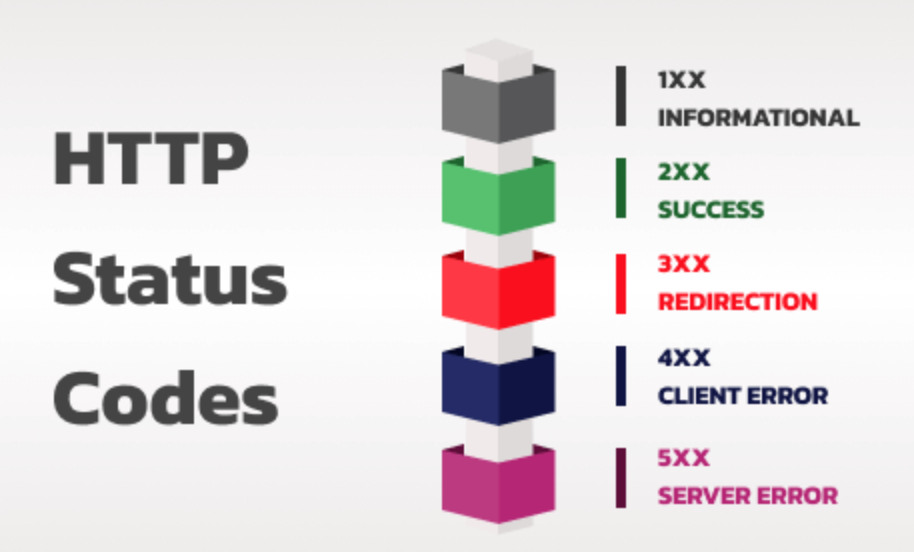

In [5]:
Image(filename='http_codes.png') 

## Первый запрос

In [7]:
url = 'https://api.coingecko.com/api/v3/ping'

result = requests.get(url)

In [8]:
result.status_code

200

In [9]:
result.text

'{"gecko_says":"(V3) To the Moon!"}'

In [10]:
url_exchanges = 'https://api.coingecko.com/api/v3/exchanges?page=3'

result_exchanges = requests.get(url_exchanges)
print(result_exchanges.status_code)

200


In [13]:
result_json = json.loads(result_exchanges.text)
type(result_json)

list

In [17]:
result_json[0]

{'id': 'soulswap',
 'name': 'Soulswap',
 'year_established': None,
 'country': None,
 'description': '',
 'url': 'https://soulswap.finance/',
 'image': 'https://assets.coingecko.com/markets/images/759/small/soulswap.jpeg?1641203564',
 'has_trading_incentive': False,
 'trust_score': 5,
 'trust_score_rank': 200,
 'trade_volume_24h_btc': 1.25425714612555,
 'trade_volume_24h_btc_normalized': 1.25425714612555}

## Получим список из 30 бирж

In [24]:
url_exchanges = 'https://api.coingecko.com/api/v3/exchanges?per_page=10&page=1'

result_exchanges = requests.get(url_exchanges)
print(result_exchanges.status_code)

200


In [42]:
result_json = json.loads(result_exchanges.text)

exchanges_dict = {} # name: id

for i in range(len(result_json)):
    print(i)
    exchanges_dict[result_json[i]['name']] = result_json[i]['id']

0
1
2
3
4
5
6
7
8
9


In [43]:
exchanges_dict

{'Binance': 'binance',
 'Coinbase Exchange': 'gdax',
 'KuCoin': 'kucoin',
 'Kraken': 'kraken',
 'Bitfinex': 'bitfinex',
 'MEXC Global': 'mxc',
 'Bybit': 'bybit_spot',
 'Bitget': 'bitget',
 'Huobi': 'huobi',
 'BingX': 'bingx'}

# Swagger

https://www.coingecko.com/en/api/documentation

In [40]:
url_volume = 'https://api.coingecko.com/api/v3/exchanges/binance/volume_chart?days=1'
result_volume = requests.get(url_volume)
result_volume = json.loads(result_volume.text)

result_volume

[[1680111000000.0, '440120.6768482509959603'],
 [1680111600000.0, '439610.9128908633432446'],
 [1680112200000.0, '440187.2843195735304583'],
 [1680112800000.0, '440422.0928099215774003'],
 [1680113400000.0, '440890.5154489170928815'],
 [1680114000000.0, '440696.614367137692097'],
 [1680114600000.0, '441421.5578831945334797'],
 [1680115200000.0, '441135.4728133931767678'],
 [1680115800000.0, '438388.3486200644913176'],
 [1680116400000.0, '429697.0008177567597933'],
 [1680117000000.0, '425671.221056423563054'],
 [1680117600000.0, '426784.0186702422451152'],
 [1680118200000.0, '420920.1562411811841498'],
 [1680118800000.0, '417197.8654700117063729'],
 [1680119400000.0, '415145.2690178625146144'],
 [1680120000000.0, '413029.4769706718064056'],
 [1680120600000.0, '410528.5195827488413413'],
 [1680121200000.0, '408133.560650352963601'],
 [1680121800000.0, '407324.9271763648602052'],
 [1680122400000.0, '407032.3657064717162338'],
 [1680123000000.0, '408321.6725194218460207'],
 [1680123600000.

## Получим объемы на бирже

In [44]:
exchanges_dict

{'Binance': 'binance',
 'Coinbase Exchange': 'gdax',
 'KuCoin': 'kucoin',
 'Kraken': 'kraken',
 'Bitfinex': 'bitfinex',
 'MEXC Global': 'mxc',
 'Bybit': 'bybit_spot',
 'Bitget': 'bitget',
 'Huobi': 'huobi',
 'BingX': 'bingx'}

In [51]:
exchange_volumes = {}

for i in exchanges_dict.keys():
    url_volume = f'https://api.coingecko.com/api/v3/exchanges/{exchanges_dict[i]}/volume_chart?days=1'
    result_volume = requests.get(url_volume)
    exchange_volumes[i] = json.loads(result_volume.text)
    print(i, ' is finished')

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [52]:
result_volume.status_code

429

In [53]:
exchange_volumes

{}

## Лимиты

https://www.coingecko.com/en/api/pricing